In [30]:
import requests;
import pandas as pd;
import yfinance as yf;
import seaborn as sns;
import pandas_ta as ta

# set seaborn style
sns.set(style="darkgrid");

In [31]:
URL = "https://elite.finviz.com/export.ashx?[v=171&s=ta_topgainers&f=geo_usa,sh_curvol_o750,sh_price_3to50,ta_changeopen_u3,ta_volatility_wo6&ft=3]&auth=7b83fc8f-810c-46d3-bbba-1e746c735ebc";
response = requests.get(URL);
data = response.text;

In [32]:
def create_dataframe( data ):
    # get the first line of data split by new line
    data = data[:-1];
    data = list( data.split( "\n" ) );

    for i,row in enumerate( data ):
        row = row.split( "\r" )[0];

        if i == 0:
            row = row.split( "," );
            # remove "" for the first row;
            row = [ x[1:-1] for x in row ];
            df = pd.DataFrame( columns = row );
        
        else:
            num = row.count( "," );

            if num != len( df.columns)-1 :
                for j in range( len( row ) ):
                    if row[j] == " " and row[j-1] == ",":
                        row = row[:j-1] + " ;" + row[j+1:];
                row = row.split( "," );
                row = [ x[1:-1] for x in row ];

                for j in range( len( row ) ):
                    if " ;" in row[j]:
                        row[j] = row[j].replace( " ;", " ," );
                df.loc[i] = row;
            
            else:
                row = row.split( "," );
                row = [ x[1:-1] for x in row ];
                df.loc[i] = row;
    
    df.set_index( "No." );
    df.reset_index( drop = True );
    return df;

In [33]:
data_df = create_dataframe( data );

###### The data df is sorted by the price change column based on the filter used in the url

In [34]:
data_df

,No.,Ticker,Company,Sector,Industry,Country,Market Cap,P/E,Price,Change,Volume
1,,JTAI,Jet.AI Inc,Technology,Software - Application,USA,.8,,.0,33.72,0428130
2,,BZAI,Blaize Holdings Inc,Technology,Software - Application,USA,8.0,,.1,8.75,19416
3,,UDMY,Udemy Inc,Consumer Defensive,Education & Training Services,USA,460.4,,0.0,8.01,02156
4,,RXRX,Recursion Pharmaceuticals Inc,Healthcare,Biotechnology,USA,114.7,,0.5,3.88,262355
5,,RCEL,AVITA Medical Inc,Healthcare,Medical Devices,USA,62.5,,0.5,0.39,5229
6,,OPRT,Oportun Financial Corp,Financial,Credit Services,USA,72.3,,.5,8.28,74144
7,,ABSI,Absci Corp,Healthcare,Biotechnology,USA,68.4,,.8,6.40,81162
8,,APLD,Applied Digital Corporation,Technology,Information Technology Services,USA,924.4,,.1,5.17,303908
9,,MNMD,Mind Medicine Inc,Healthcare,Biotechnology,USA,78.5,,.8,4.34,07672
10,,SMCI,Super Micro Computer Inc,Technology,Computer Hardware,USA,8054.6,4.0,7.9,3.32,3236107


In [35]:
def get_stock_data( ticker, period=None, interval=None ):
    stock = yf.Ticker( ticker );
    if period == None and interval == None:
        stock_data = stock.history( period = "max" );
    
    elif period == None and interval != None:
        stock_data = stock.history( interval = interval );
    elif period != None and interval == None:
        stock_data = stock.history( period = period );
    else:
        stock_data = stock.history( period = period, interval = interval ); 
        
    stock_data = stock_data[["Open", "High", "Low", "Close", "Volume"]];
    stock_data = stock_data.reset_index();
    if "Datetime" in stock_data.columns:
        # split 2021-10-05 00:00:00-04:00 into date time 
        stock_data["Datetime"] = stock_data["Datetime"].dt.tz_localize(None);
        stock_data["Date"] = stock_data["Datetime"].dt.date;
        stock_data["Time"] = stock_data["Datetime"].dt.time;
        stock_data = stock_data.drop( "Datetime", axis = 1 );
    #stock_data = stock_data.set_index( index );
    
    return stock_data;

In [36]:
stock_name = data_df["Ticker"][1];
print(f"Getting data for {stock_name}");
maxdata_top1_df = get_stock_data( stock_name );

Getting data for JTAI


In [37]:
maxdata_top1_df

,Date,Open,High,Low,Close,Volume
0,2021-10-01 00:00:00-04:00,2209.50,2209.500,2209.500000,2209.50,0
1,2021-10-04 00:00:00-04:00,2209.50,2209.500,2209.500000,2209.50,0
2,2021-10-05 00:00:00-04:00,2209.50,2216.250,2209.500000,2216.25,492
3,2021-10-06 00:00:00-04:00,2205.00,2216.250,2196.675049,2216.25,646
4,2021-10-07 00:00:00-04:00,2216.25,2216.250,2211.750000,2214.00,2852
...,...,...,...,...,...,...
842,2025-02-10 00:00:00-05:00,2.56,2.590,2.459000,2.55,68200
843,2025-02-11 00:00:00-05:00,2.61,2.610,2.410000,2.47,47800
844,2025-02-12 00:00:00-05:00,2.41,2.511,2.350000,2.46,43200
845,2025-02-13 00:00:00-05:00,2.48,2.590,2.370000,2.58,93900


In [38]:
def plot_stock_data( stock_data, tick=None ):
    # set seaborn plot size
    sns.set(rc={'figure.figsize':(11.7,8.27)});
    stock_data = stock_data[stock_data.columns];
    
    if tick == "hourly":
        stock_data = stock_data.set_index( "Time" );
    else:
        if "Date" in stock_data.columns:
            #set the index
            stock_data = stock_data.set_index( "Date" );
    stock_data.plot( y = "Close" );
    stock_data.plot( y = "Volume" );

    return;

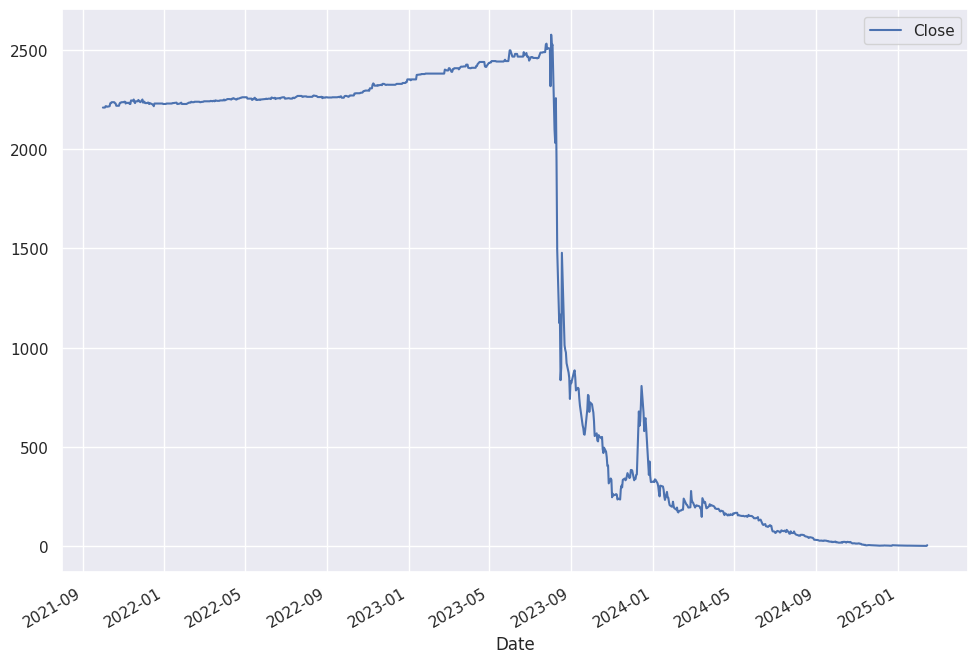

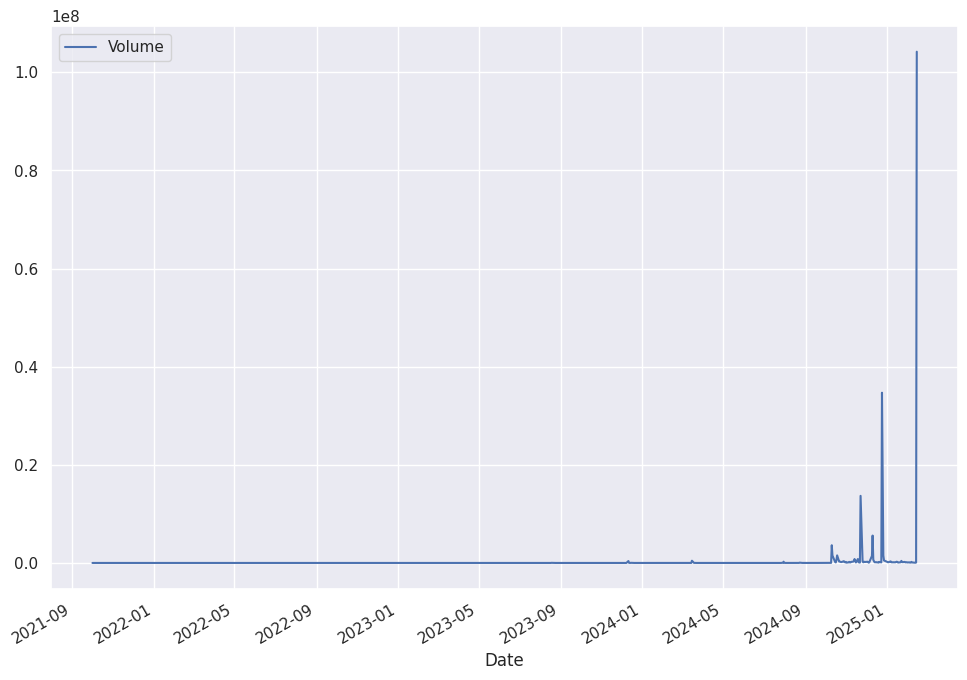

In [39]:
plot_stock_data( maxdata_top1_df );

In [40]:
hourly_data = get_stock_data( stock_name, period="1d", interval="1h" );
five_min_data = get_stock_data( stock_name, period="1d", interval="5m" );
fiveteen_min_data = get_stock_data( stock_name, period="1d", interval="15m" );
print( hourly_data.columns )

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Date', 'Time'], dtype='object')


In [41]:
hourly_data

,Open,High,Low,Close,Volume,Date,Time
0,5.8003,8.2000,5.0701,7.0500,56850753,2025-02-14,09:30:00
1,7.0824,7.1899,5.5500,5.7799,12506672,2025-02-14,10:30:00
2,5.7799,6.2200,5.0901,5.5600,8202179,2025-02-14,11:30:00
3,5.5540,6.7700,5.5201,6.0500,15006400,2025-02-14,12:30:00
4,6.0600,6.1699,5.5701,5.7808,5030199,2025-02-14,13:30:00
5,5.7899,5.9700,5.4500,5.8800,2718600,2025-02-14,14:30:00
6,5.8800,6.2000,5.7000,6.0200,3275126,2025-02-14,15:30:00


In [42]:
five_min_data

,Open,High,Low,Close,Volume,Date,Time
0,5.8003,6.47,5.6300,6.0500,17852567,2025-02-14,09:30:00
1,6.0500,6.07,5.2300,5.4999,2816570,2025-02-14,09:35:00
2,5.4999,5.75,5.1300,5.2100,1826537,2025-02-14,09:40:00
3,5.2000,5.65,5.0701,5.5400,1266101,2025-02-14,09:45:00
4,5.5700,7.12,5.4400,7.1200,4794407,2025-02-14,09:50:00
...,...,...,...,...,...,...,...
73,6.1106,6.14,5.8700,5.9600,375773,2025-02-14,15:35:00
74,5.9400,6.14,5.9100,6.1200,453801,2025-02-14,15:40:00
75,6.1140,6.15,6.0200,6.0403,313075,2025-02-14,15:45:00
76,6.0500,6.09,5.7800,5.9300,482590,2025-02-14,15:50:00


In [43]:
fiveteen_min_data

,Open,High,Low,Close,Volume,Date,Time
0,5.8003,6.4700,5.1300,5.2100,22495674,2025-02-14,09:30:00
1,5.2000,7.8700,5.0701,7.8500,8714314,2025-02-14,09:45:00
2,7.8200,8.2000,6.4101,7.1162,15022659,2025-02-14,10:00:00
3,7.1900,7.8499,6.9000,7.0500,10618106,2025-02-14,10:15:00
4,7.0824,7.1899,6.3100,6.6900,4750187,2025-02-14,10:30:00
5,6.7100,6.7399,5.7500,5.8150,3449451,2025-02-14,10:45:00
6,5.8300,6.4599,5.7200,5.9079,2231463,2025-02-14,11:00:00
7,5.8800,6.1399,5.5500,5.7799,2075571,2025-02-14,11:15:00
8,5.7799,5.8000,5.3700,5.4709,1796283,2025-02-14,11:30:00
9,5.4800,5.6199,5.0901,5.5103,1382194,2025-02-14,11:45:00


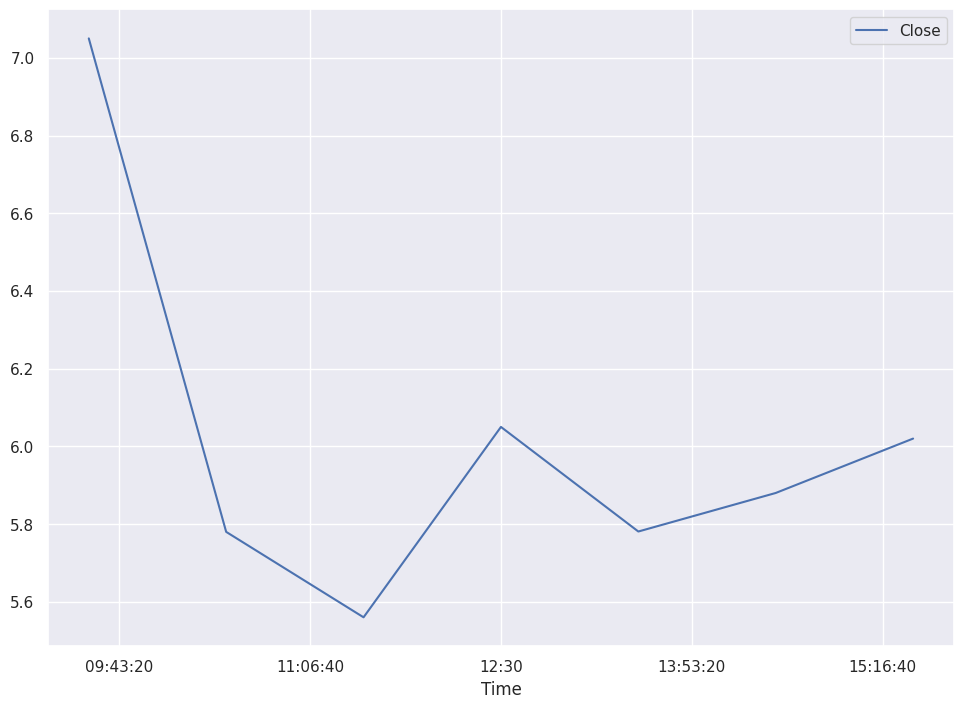

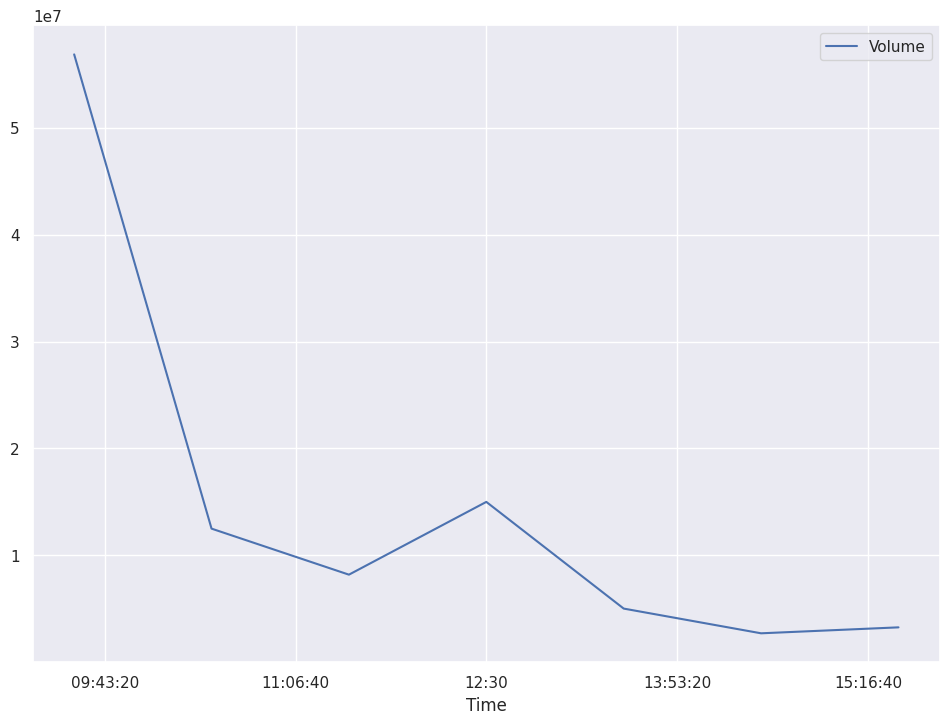

In [44]:
plot_stock_data( hourly_data, tick='hourly' );

In [70]:
def plot_candlestick( stock_data, af, max_af ):
    # set seaborn plot size
    sns.set(rc={'figure.figsize':(11.7,8.27)});
    stock_data = stock_data.set_index("Time")
    stock_data['PSAR'] = ta.psar(stock_data['High'], stock_data['Low'], stock_data['Close'], af=af, max_af=max_af)[f'PSARl_{af}_{max_af}']
    stock_data["Close"].plot(kind="line", label="Close");
    stock_data['PSAR'].plot(kind='line', label='PSAR', linestyle='--')
    return;

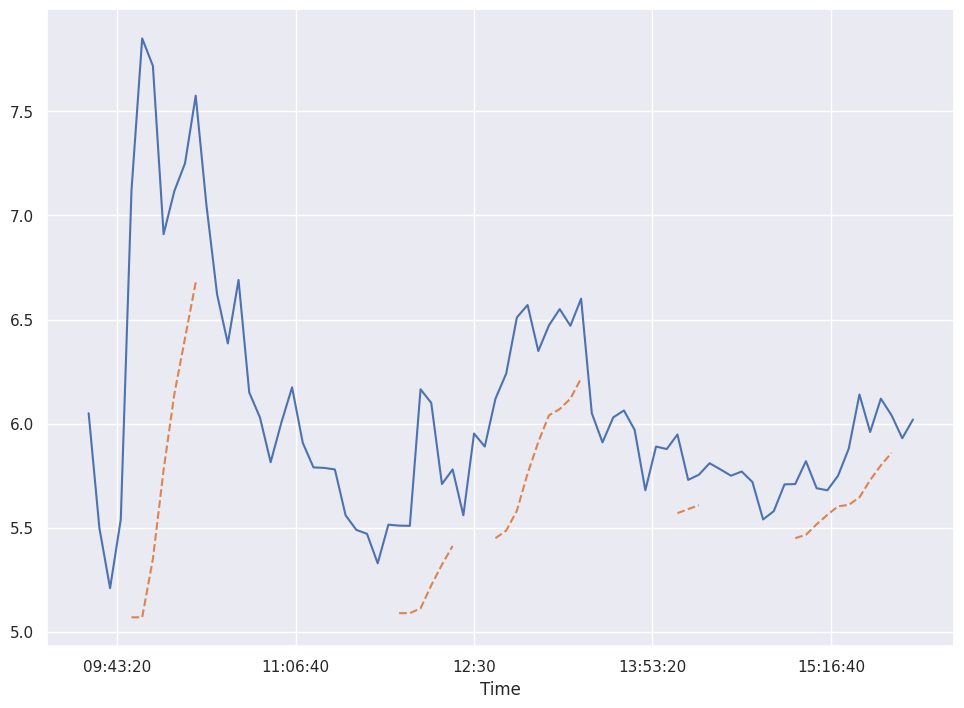

In [71]:
plot_candlestick( five_min_data, af=0.05, max_af=0.2 );